Program trains 10 independent classifiers each capabal of recognizing one digit from 0 to 9 in the MNIST data set. 
loadmat from scipy.io is used to load the dataset from the .mat file.
gradient descent is used to optimize the cost function 
After trying different learning rates to choose the proper one, an accuracy of % was achieved in the training set.

In [1]:
from scipy.io import loadmat
import scipy.optimize as optimizer
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
data = loadmat('ex3data1.mat')['X']
Y = loadmat('ex3data1.mat')['y'].flatten()
num_labels = 10

In [8]:
def mnist_visualizer(x):
    '''
    imput is a (400,) array representing an mnist sample
    Converts the sample to (20,20) data and plots the sample number
    '''
    y = np.empty(shape =(20,20))
    for irow in range (20):
        y[irow,:] = x[20*irow:20*(irow+1)]
    w = 4
    h = 3
    d = 70
    plt.figure(figsize=(w, h), dpi=d)
    color_map = plt.imshow(np.transpose(y))
    color_map.set_cmap("Blues_r")
    plt.colorbar()

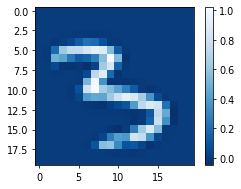

In [13]:
mnist_visualizer(data[1700])

In [14]:
def sigmoid (x):
    if type (x) == np.ndarray:
        return 1/(1 + np.exp(-x))
    else:
        return 1/(1+math.exp(-x))
def r_cost  (theta, X, y, lamda):
    m = X.shape[0]
    n = X.shape[1]
    #Calculating yhat for all the points in X
    h_theta = sigmoid ( X@theta )
    #Calculating cost
    cost = (1/m) * sum( -y*np.log10(h_theta) - (1-y)*np.log10(1-h_theta) )
    #regularization effect
    temp = theta
    temp[0] = 0
    cost += (lamda / (2 * m)) * np.sum(np.square(temp))
    #Storing the difference between estimation and the labels in diff
    diff = h_theta - y
    gradients = (1/m) * (np.transpose (X) @ diff)
    #Regularization effect
    gradients = gradients + (lamda / m) * temp
    return cost,gradients

In [15]:
def oneVsAll(X, y, lamda, num_labels, alpha=0.2,iterations=1000):
    """
    X is input data. constant coeffients will be added to it.
    y is corresponding label. 
    lamda is regularization parameter
    num_labels shows the number of target classes or 
    number of classifiers we intend to train
    """
    m, n = X.shape
    #Each row contains theta for one target class
    #1 is added to the columns to add the constant "theta_0"
    all_theta_graddescent = np.zeros((num_labels, n + 1))
    all_theta_scipy = np.zeros((num_labels, n + 1))
    #1 is added to the columns to add the constant 
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    #Optimization using gradient descent
    print (f'alpha is {alpha}')
    for c in np.arange(num_labels):
        y_class = np.array([1 if item==c else 0 for item in y]).reshape(y.shape)
        initial_theta = np.zeros(n + 1)
        #Choosing the appropriate learning rate
        #print (f'class num trained  {c}')
        theta = gradient_descent (X, initial_theta, y_class, alpha, iterations)
        all_theta_graddescent[c] = theta
    return all_theta_graddescent

In [16]:
def gradient_descent (X, theta, Y, alpha=0.1, iterations=1500, lamda=3):
    for counter in range (iterations):
        #m is number of columns in X
        m = X.shape[0]
        cost, gradients = r_cost (theta, X, Y, lamda)
        #Updating theta
        new_theta = []
        for i,gradient in enumerate (gradients):
            new_theta.append( theta[i]-alpha*gradient)
        theta = np.array(new_theta)
    return theta

In [17]:
def predictOneVsAll(all_theta, X):
    '''
    It takes the images and runs them through all 10 trained classifiers : sigmoid(X.dot(all_theta.T)
    It out puts the index of the class with the highest probabilty using np.argmax()
    '''
    m = X.shape[0];
    num_labels = all_theta.shape[0]
    # You need to return the following variables correctly 
    p = np.zeros(m)
    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    # ====================== YOUR CODE HERE ======================
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
    # ============================================================
    return p

In [20]:
alphas = [0.1,0.5,0.8,1,1.5,1.8,2.1,2.5]
res = []
lamda = 3
for alpha in alphas:
    all_theta = oneVsAll(data, Y, lamda, num_labels, alpha)
    pred = predictOneVsAll(all_theta, data)
    mean = np.mean(pred == Y) * 100
    res.append ([alpha,mean])
res = np.array (res)


alpha is 0.1
alpha is 0.5
alpha is 0.8
alpha is 1
alpha is 1.5
alpha is 1.8
alpha is 2.1
alpha is 2.5


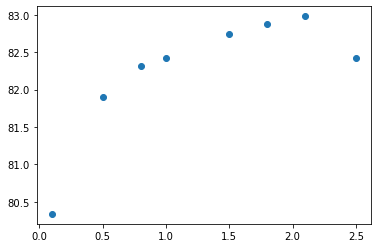

In [21]:
#iterations = 10000
import matplotlib.pyplot as plt
plt.scatter (res[:,0],res[:,1])
plt.show()

It seems that learning_rate = 2.5 gives the highest accuracy. So we train the network with that.

In [22]:
lamda=1
alpha = 2.5
all_theta = oneVsAll(data, Y, lamda, num_labels, alpha)
pred = predictOneVsAll(all_theta, data)
mean = np.mean(pred == Y) * 100

alpha is 2.5


Neural Networks
In this exercise forward propagation is used to see how a neural network detects handwritten digits. 
Weights of each layer are loaded from a precalculated file. They will be calculated in the next exercise using backpropagation. 

In [23]:
def sigmoid (x):
    if type (x) == np.ndarray:
        return 1/(1 + np.exp(-x))
    else:
        return 1/(1+math.exp(-x))

In [24]:
input_layer_size  = 400  
hidden_layer_size = 25   
num_labels = 10
X = loadmat('ex3data1.mat')['X']
y = loadmat('ex3data1.mat')['y'].flatten()
weights = loadmat('ex3weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']
counter_1 = 0
for item in y:
    if item==1:
        counter_1 += 1
print (counter_1)

500


In [25]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(X.shape[0])
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    a2 = sigmoid( X @  np.transpose(Theta1)  ) 
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    probs = sigmoid( a2 @   np.transpose(Theta2) )
    p = np.argmax(probs, axis = 1)
    return probs,p

In [26]:
probs, pred = predict(Theta1, Theta2, X)
pred = pred + 1
print (f'p:{pred}')
print (0 in y)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))
print (probs[0])

p:[10 10 10 ...  9  9  9]
False
Training Set Accuracy: 97.5%
[1.12661530e-04 1.74127856e-03 2.52696959e-03 1.84032321e-05
 9.36263860e-03 3.99270267e-03 5.51517524e-03 4.01468105e-04
 6.48072305e-03 9.95734012e-01]


In [27]:
X.shape, Theta1.shape, Theta2.shape

((5000, 400), (25, 401), (10, 26))

label 3
pred 3


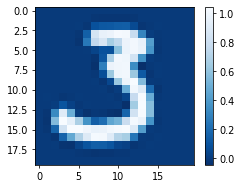

In [29]:
item = 1900
mnist_visualizer (X[item])
print('label',y[item])
print ('pred',pred [item])